In [1]:
import json
import pandas as pd

# 데이터 전처리

In [2]:
table = {'sha256': list(), 'label': list(), 'entropy': list(), 'name': list(), 'size': list(), 'imports0': list(), 'imports1': list()}
functions_no_name, functions_dll_name = dict(), dict()

for n in range(6):
    num = 0
    with open(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/train_features_{n}.jsonl') as file:
        # jsonl 파일에서 json 파일 읽기
        while True:
            line = file.readline()
            if not line:
                break
            line_json = json.loads(line)

            # sha256, label 컬럼 추가
            table['sha256'].append(line_json['sha256'])    
            table['label'].append(line_json['label'])

            # entropy, name, size 컬럼 추가
            entropy, name, size = list(), list(), list()
            for sec in line_json['section']['sections']:
                entropy.append(round(sec['entropy'], 4))
                name.append(sec['name'])
                size.append(sec['size'])
            
            # imports 내 dll과 함수명 라벨 인코딩 후 추가
            imports0, imports1 = list(), list()
            for key, value in line_json['imports'].items():
                for val in value:
                    if val not in functions_no_name:
                        functions_no_name[val] = len(functions_no_name) + 1
                    if f'{key}_{val}' not in functions_dll_name:
                        functions_dll_name[f'{key}_{val}'] = len(functions_dll_name) + 1
                    imports0.append(functions_no_name[val])
                    imports1.append(functions_dll_name[f'{key}_{val}'])
            
            table['entropy'].append(entropy)
            table['name'].append(name)
            table['size'].append(size)
            table['imports0'].append(imports0)
            table['imports1'].append(imports1)

            num += 1
            if num % 1000 == 0:
                print(f'\rjsonl{n} : {num}', end='')
        print(f'\rjsonl{n} : {num}')

train_df = pd.DataFrame(table)
train_df['cond1'] = train_df['size'].map(lambda x: 1 if sum(map(lambda y: 0 if y else 1, x)) else 0)
train_df['cond2'] = train_df['entropy'].map(lambda x: 1 if sum(map(lambda y: 0 if 0 < y < 7 else 1, x)) else 0)
train_df['cond_1or2'] = train_df['cond1'] | train_df['cond2']

print('함수 이름 개수 :', len(functions_no_name))
print('dll명 + 함수 이름 개수 :', len(functions_dll_name))

jsonl0 : 50000
jsonl1 : 170000
jsonl2 : 170000
jsonl3 : 170000
jsonl4 : 170000
jsonl5 : 170000
함수 이름 개수 : 3605003
dll명 + 함수 이름 개수 : 5642322


In [3]:
train_df

,sha256,label,entropy,name,size,imports0,imports1,cond1,cond2,cond_1or2
0,0abb4fda7d5b13801d63bee53e5e256be43e141faa077a...,0,"[6.5322, 5.4331, 1.7424, -0.0, 5.0209]","[.text, .rdata, .data, .rsro, .rsrc]","[26624, 6656, 512, 0, 27648]","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,1,1
1,d4206650743b3d519106dea10a38a55c30467c3d9f7875...,0,"[-0.0, 7.9237, 4.1467]","[UPX0, UPX1, .rsrc]","[0, 288768, 5632]","[53, 142, 157, 158, 159, 160, 131, 115, 151]","[157, 158, 159, 160, 161, 162, 163, 164, 165]",1,1,1
2,c9cafff8a596ba8a80bafb4ba8ae6f2ef3329d95b85f15...,0,"[6.8229, 6.2047, 3.6912]","[.text, .data, .rsrc]","[455680, 8192, 39424]","[161, 162, 163, 164, 165, 166, 167, 168, 169, ...","[166, 167, 168, 169, 170, 171, 172, 173, 174, ...",0,0,0
3,7f513818bcc276c531af2e641c597744da807e21cc1160...,0,"[6.5993, 4.1286, -0.0, 4.6462, -0.0, 2.0491, -...","[CODE, DATA, BSS, .idata, .tls, .rdata, .reloc...","[36864, 1024, 0, 2560, 0, 512, 0, 10240]","[440, 60, 87, 648, 742, 137, 257, 743]","[747, 748, 749, 750, 751, 752, 753, 754]",1,1,1
4,ca65e1c387a4cc9e7d8a8ce12bf1bcf9f534c9032b9d95...,0,"[6.5914, 4.0991, 7.9861]","[.text, .data, .rsrc]","[34304, 1024, 1116672]","[142, 203, 213, 214, 254, 257, 744, 197, 140, ...","[142, 208, 218, 219, 259, 262, 755, 202, 140, ...",0,1,1
...,...,...,...,...,...,...,...,...,...,...
899995,fffe4814bd4e333d91f710df8ec2e56e31ff8afb13099b...,1,"[6.2354, 6.5561, -0.0, 5.077, 3.5596, 4.8273]","[.text, .data, .bss, .idata, .rsrc, .reloc]","[4608, 115712, 0, 2048, 5120, 512]","[23, 31, 320, 294, 394, 10, 52, 54, 389, 7169,...","[23, 31, 325, 299, 399, 10, 52, 54, 394, 8734,...",1,1,1
899996,fffe8eafb43ce2181cb124413f2d54bf12ab99815922ab...,1,"[4.7255, -0.0, 4.2237]","[.text, .data, .rsrc]","[45056, 0, 24576]","[7982, 5753, 7918, 5891, 4568, 8533, 8536, 792...","[9719, 18376, 18377, 9722, 10456, 10470, 10475...",1,1,1
899997,ffff49525f240d58e198ca4e08ea1a7fe1632bf0411950...,-1,"[5.8094, -0.0, 4.0115]","[.text, .data, .rsrc]","[147456, 4096, 12288]","[8940, 8501, 55789, 7902, 7903, 8502, 7904, 79...","[10954, 10409, 78314, 10411, 10412, 10413, 104...",0,1,1
899998,ffff9a65324d628e3ef0a830f5460fda18acaa02279158...,1,"[5.6962, -0.0, 4.7162]","[.text, .data, .rsrc]","[28672, 4096, 266240]","[7902, 7903, 7904, 8507, 7908, 7910, 7912, 851...","[10411, 10412, 10416, 10419, 10423, 10426, 104...",0,1,1


In [4]:
table = {'sha256': list(), 'label': list(), 'entropy': list(), 'name': list(), 'size': list(), 'imports0': list(), 'imports1': list()}

num = 0
with open(f'/content/drive/MyDrive/최종프로젝트_7조/dataset/train_features_{n}.jsonl') as file:
    while True:
        line = file.readline()
        if not line:
            break
        line_json = json.loads(line)

        table['sha256'].append(line_json['sha256'])    
        table['label'].append(line_json['label'])

        entropy, name, size = list(), list(), list()
        for sec in line_json['section']['sections']:
            entropy.append(round(sec['entropy'], 4))
            name.append(sec['name'])
            size.append(sec['size'])
        
        # imports 내 dll과 함수명 라벨 인코딩 후 추가
        # train에서 보지 못한 dll과 함수들은 -1로 처리
        imports0, imports1 = list(), list()
        for key, value in line_json['imports'].items():
            for val in value:
                imports0.append(functions_no_name[val] if val in functions_no_name else -1)
                imports1.append(functions_dll_name[f'{key}_{val}'] if f'{key}_{val}' in functions_dll_name else -1)
        
        table['entropy'].append(entropy)
        table['name'].append(name)
        table['size'].append(size)
        table['imports0'].append(imports0)
        table['imports1'].append(imports1)

        num += 1
        if num % 1000 == 0:
            print(f'\rjsonl_test : {num}', end='')
    print(f'\rjsonl_test : {num}')

test_df = pd.DataFrame(table)
test_df['cond1'] = test_df['size'].map(lambda x: 1 if sum(map(lambda y: 0 if y else 1, x)) else 0)
test_df['cond2'] = test_df['entropy'].map(lambda x: 1 if sum(map(lambda y: 0 if 0 < y < 7 else 1, x)) else 0)
test_df['cond_1or2'] = test_df['cond1'] | test_df['cond2']

jsonl_test : 170000


In [5]:
test_df

,sha256,label,entropy,name,size,imports0,imports1,cond1,cond2,cond_1or2
0,000154a86a617128b26fabf904e5705e17d2247ca38405...,1,"[6.6916, 5.8193, 4.6977, 3.8303, 6.695]","[.text, .rdata, .data, .rsrc, .reloc]","[301568, 123392, 10752, 1536, 18432]","[367, 54, 420, 69317, 13959, 18, 394, 10, 412,...","[372, 54, 425, 97462, 19445, 18, 399, 10, 417,...",0,0,0
1,0003de45dfae52bdf19b846e7cae96cf2a5375a8147d9a...,-1,"[6.6215, 5.0712, 6.1064, 4.3759, 3.7024]","[.text, .rdata, .data, .rsrc, .reloc]","[283136, 50176, 13824, 1536, 49152]","[309, 1861, 955, 142871, 18, 394, 420, 34, 153...","[314, 2122, 966, 213703, 18, 399, 425, 34, 173...",0,0,0
2,0003e6f98f4cb8a10fd64b06d3f48b5ffee4e331f06999...,1,"[7.9866, 5.0466, 1.2588, -0.0, 2.1966]","[.text, .rdata, DATA, 3fba5, .rsrc]","[581632, 4096, 4096, 4096, 86016]","[122602, 150854, 7010, 2072, 412, 60, 356, 389...","[817223, 837034, 8533, 2392, 417, 60, 361, 394...",0,1,1
3,0004d5441cc954466cef2b89414aa24d7ab63426326da2...,0,"[5.6532, 0.2343, 5.1852, 3.4865, 4.5669, 4.359...","[.text, .data, .rdata, .buildid, .pdata, .xdat...","[73728, 512, 3584, 512, 1024, 1024, 0, 512, 35...","[252748, 6956, 59982, 1079, 59987, 11635, 5999...","[378642, 773385, 83865, 15692, 83872, 15696, 8...",1,1,1
4,0005b47f949796d6c0689320f6c96518c681c92bd7b65f...,0,"[5.8082, -0.0, 4.4727, 5.7763]","[.text, .data, .rsrc, .reloc]","[139264, 4096, 16384, 16384]","[8501, 8940, 7901, 7902, 7903, 8502, 8503, 850...","[10409, 10954, 10410, 10411, 10412, 10413, 104...",0,1,1
...,...,...,...,...,...,...,...,...,...,...
169995,fffe4814bd4e333d91f710df8ec2e56e31ff8afb13099b...,1,"[6.2354, 6.5561, -0.0, 5.077, 3.5596, 4.8273]","[.text, .data, .bss, .idata, .rsrc, .reloc]","[4608, 115712, 0, 2048, 5120, 512]","[23, 31, 320, 294, 394, 10, 52, 54, 389, 7169,...","[23, 31, 325, 299, 399, 10, 52, 54, 394, 8734,...",1,1,1
169996,fffe8eafb43ce2181cb124413f2d54bf12ab99815922ab...,1,"[4.7255, -0.0, 4.2237]","[.text, .data, .rsrc]","[45056, 0, 24576]","[7982, 5753, 7918, 5891, 4568, 8533, 8536, 792...","[9719, 18376, 18377, 9722, 10456, 10470, 10475...",1,1,1
169997,ffff49525f240d58e198ca4e08ea1a7fe1632bf0411950...,-1,"[5.8094, -0.0, 4.0115]","[.text, .data, .rsrc]","[147456, 4096, 12288]","[8940, 8501, 55789, 7902, 7903, 8502, 7904, 79...","[10954, 10409, 78314, 10411, 10412, 10413, 104...",0,1,1
169998,ffff9a65324d628e3ef0a830f5460fda18acaa02279158...,1,"[5.6962, -0.0, 4.7162]","[.text, .data, .rsrc]","[28672, 4096, 266240]","[7902, 7903, 7904, 8507, 7908, 7910, 7912, 851...","[10411, 10412, 10416, 10419, 10423, 10426, 104...",0,1,1


In [6]:
max_len = 0
for functions in train_df['imports1']:
    max_len = max(max_len, len(functions))
print('가장 많은 함수를 호출한 파일의 함수 호출 개수', max_len)

count = 0
for functions in test_df['imports1']:
    for dll_func in functions:
        if dll_func == -1:
            count += 1

print('학습되지 못한 "dll + 함수명"의 개수', count)

가장 많은 함수를 호출한 파일의 함수 호출 개수 3871603
학습되지 못한 "dll + 함수명"의 개수 0


In [7]:
# DataFrame 저장
train_df.to_csv('/content/drive/MyDrive/최종프로젝트_7조/dataset/train_main_features_NJ.csv')
test_df.to_csv('/content/drive/MyDrive/최종프로젝트_7조/dataset/test_main_features_NJ.csv')

# EDA

In [8]:
train_pivot_df = train_df.pivot_table(index='label', columns='cond_1or2', values='sha256', aggfunc='count')
train_pivot_df

cond_1or2,0,1
label,,
-1,132392,167608
0,208276,91724
1,91483,208517


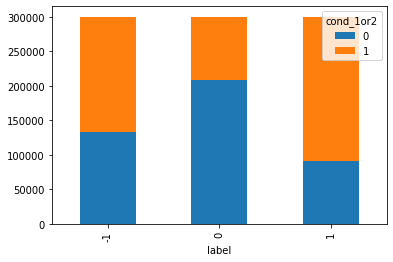

In [9]:
train_pivot_df.plot.bar(stacked=True)

# word2vec

In [1]:
import pandas as pd
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [2]:
# RAM 터져서 세션 다운되서 다시 부름
train_df = pd.read_csv('/content/drive/MyDrive/최종프로젝트_7조/dataset/train_main_features_NJ.csv')
test_df = pd.read_csv('/content/drive/MyDrive/최종프로젝트_7조/dataset/test_main_features_NJ.csv')

In [3]:
train_df = train_df.loc[:100]
test_df = test_df.loc[:100]

In [13]:
x_train, y_train = train_df['imports1'], train_df['label']
x_test, y_test = test_df['imports1'], test_df['label']

In [14]:
x_train = list(map(lambda x: eval(x), x_train))
x_test = list(map(lambda x: eval(x), x_test))

In [12]:
temp = list()
less100 = 0
more100 = 0
for x in train_df['imports1']:
    len_x = len(x)
    temp.append(len_x)
    if len_x > 100:
        more100 += 1
    else:
        less100 += 1
print(less100, more100)

379321 520679


In [15]:
word2vector = Word2Vec(x_train, size=100)

TypeError: ignored